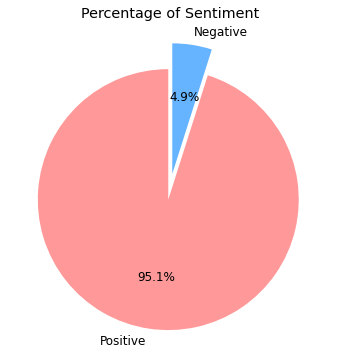

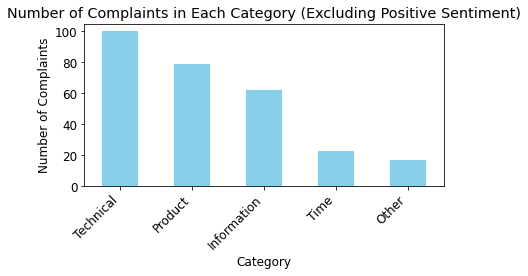

In [51]:
import pandas as pd
import csv
import re
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

# Load data with specified delimiter, header row, and encoding
try:
    complaints_data = pd.read_csv('onboarding.csv', sep=';', quoting=csv.QUOTE_MINIMAL, error_bad_lines=False, encoding='latin1')
except FileNotFoundError:
    print("Error: File 'onboarding.csv' not found.")
except pd.errors.EmptyDataError:
    print("Error: File 'onboarding.csv' is empty.")

# Text Preprocessing for Bahasa Indonesia
factory = StemmerFactory()
stemmer = factory.create_stemmer()

def preprocess_text(text):
    text = str(text).lower()  # Convert to lowercase
    return text

# Check if text column exists in the DataFrame
if text_column in complaints_data.columns:
    # Fill empty values or whitespaces with 'ok'
    complaints_data[text_column] = complaints_data[text_column].fillna('ok')
    # Apply enhanced text preprocessing
    complaints_data[text_column] = complaints_data[text_column].apply(lambda x: preprocess_text(x))
else:
    print(f"Error: '{text_column}' column not found in DataFrame. Check your CSV file and column names.")

# Categorize data into appropriate problem categories
CATEGORY_MAPPING = {
    'Information': ['file ppt','istilah','detail','informasi','booklet','pdf','recording','FAQ','jadwal','link','arahan','penjelasan','pemahaman','penjelasannya'],
    'Product': ['aplikasi','job connection','talent pool','real case','case','task','program','grup','perusahaan','latihan','latihannya','live','sesi live','proyek','proyeknya','mentoring','sertifikat','free','vip','media','telegram','project','PBI'],
    'Technical': ['pemaparan','pemaparannya','interaktif','bahasa','terburu-buru','santai','on-boarding','onboarding','audio','tanya','zoom','pertanyaan','komunikasi','lambat','cepat','padat','chat zoom','QnA','qna','video','menonaktifkan','mematikan','materi','materinya','gaya presentasi','presentasi','admin','berisik','jaringan'],
    'Time': ['hari','minggu','weekend','weekdays','weekday','pagi','kurang lama','sejam','satu jam','lebih panjang','dua jam','waktu','overtime','telat','lebih lama','adzan','isya','malam','sore','siang']
}

# New category mapping for 'positive' and 'negative'
CATEGORY_MAPPING_2 = {
    'Negative': ['buruk','maybe', 'instead', 'seharusnya', 'terkadang', 'error', 'eror', 'mungkin bisa', 'menyesal', 'rugi', 'sedih', 'kesal', 'baiknya', 'jika', 'andai', 'harusnya', 'kecewa', 'perbaiki', 'diperbaiki'],
    'Positive': ['pertahankan','sesuai harapan','sesuai','memuaskan','', '      ', 'cukup', 'berharga', 'yang baik', 'bersemangat', 'tidak ada', 'baik', 'keren', 'bagus', '-', ' ', 'terimakasih', 'ok', 'oke', 'nope', 'sip', 'membantu', 'good', 'good work']
}

def categorize_sentiment(text):
    for sentiment, keywords in CATEGORY_MAPPING_2.items():
        if any(keyword in text.lower() for keyword in keywords):
            return sentiment
    return 'Other'

# Function to categorize the 'Category'
def categorize_category(text):
    for category, keywords in CATEGORY_MAPPING.items():
        if any(keyword in text.lower() for keyword in keywords):
            return category
    return 'Other'

# Add 'Sentiment' column
complaints_data['Sentiment'] = complaints_data[text_column].apply(categorize_sentiment)

# Add 'Category' column
complaints_data['Category'] = complaints_data[text_column].apply(categorize_category)

# Save the updated DataFrame to an Excel file
complaints_data.to_excel('processed_onboarding.csv.xlsx', index=False)

# Plotting
plt.rcParams['font.family'] = 'DejaVu Sans'  # Fallback to a system font if 'Roboto' is not found
plt.rcParams['font.size'] = 12

# Pie chart for Sentiment
sentiment_counts = complaints_data['Sentiment'].value_counts()
colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99']
explode = (0.1,) * len(sentiment_counts)  # Equal explosion for all slices
plt.figure(figsize=(10, 6))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=90, colors=colors, explode=explode)
plt.title('Percentage of Sentiment')
plt.show()

# Bar chart for Category excluding 'Positive'
category_counts = complaints_data[complaints_data['Sentiment'] != 'Positive']['Category'].value_counts()
category_counts.plot(kind='bar', color='skyblue')
plt.title('Number of Complaints in Each Category (Excluding Positive Sentiment)')
plt.xlabel('Category')
plt.ylabel('Number of Complaints')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


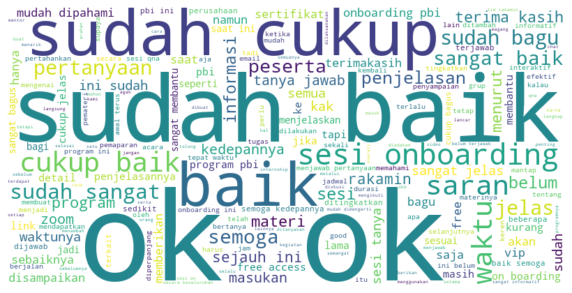

In [43]:
from wordcloud import WordCloud

# Assuming 'Masukan dan Saran' is the column containing text
all_text = ' '.join(complaints_data['Masukan dan Saran'].dropna())

# Word Cloud
wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=custom_stopwords).generate(all_text)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()
